In [180]:
from sklearn.metrics import pairwise_distances 
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [181]:
# passing encoding to resolve UnicodeDecodeError
book = pd.read_csv('book.csv',encoding='iso-8859-1')

In [182]:
# drop unnecessary column
book.drop(['Unnamed: 0'],
          axis=1,
          inplace=True)

In [183]:
book.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [184]:
# we have 10000 observations 
# and 3 columns 
book.shape

(10000, 3)

In [185]:
# found 7 duplicate [userID,BookTitle] 
print(f'dataset contains {book[["User.ID","Book.Title"]].duplicated().sum()} duplicate observations')
book[book[['User.ID','Book.Title']].duplicated()]

dataset contains 7 duplicate observations


,User.ID,Book.Title,Book.Rating
2001,278418,White Oleander : A Novel,5
3792,1211,Black House,9
4745,2033,The First Time,2
5051,2152,Le nouveau soleil de Teur,7
5219,2276,In the Beauty of the Lilies,10
7439,3757,The Magician's Tale,7
9945,162052,Rose,8


In [186]:
# dropping duplicate [userID,BookTitle]
book.drop(book[book[['User.ID','Book.Title']].duplicated()].index,
          inplace=True)

In [187]:
# no duplicates present 
book[['User.ID','Book.Title']].duplicated().sum()

0

In [188]:
# there are no null values present in dataset 
book.isnull().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [189]:
# after cleaning data 
# we have 9993 observations 
book.shape

(9993, 3)

In [190]:
# No. of items > No. of users 
print(f'No. of unique users {book["User.ID"].nunique()}')
print(f'No. of unique books {book["Book.Title"].nunique()}')

No. of unique users 2182
No. of unique books 9659


### Since no. of items > no. of users , will make 'user-based recommendation engine'

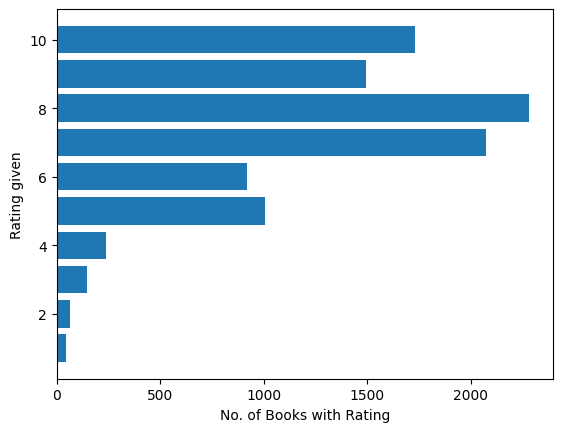

In [191]:
# how many books got particular rating 
data = dict(book['Book.Rating'].value_counts())
plt.barh(sorted(data),[data[x] for x in sorted(data)])
plt.ylabel('Rating given')
plt.xlabel('No. of Books with Rating')
plt.show()

In [192]:
rating = book.groupby(by=['Book.Title']).mean()[['Book.Rating']]

In [193]:
# maybe users liked them most 
print(f'No. of books with average rating more than 8 : {len(rating[rating["Book.Rating"] > 8])}')

No. of books with average rating more than 8 : 3121


In [194]:
# may be users didn't like them
print(f'No. of books with average rating less than 3 : {len(rating[rating["Book.Rating"] < 3])}')

No. of books with average rating less than 3 : 99


In [195]:
# pivot table
bookPivot = pd.pivot_table(book,index='User.ID',
                           columns='Book.Title',
                           values='Book.Rating')

In [196]:
# replace 'nan' values by 0
bookPivot.fillna(0,inplace=True)

In [197]:
bookPivot

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [198]:
# calculating similarity between users 
# using cosine similarity
userSim = 1 - pairwise_distances(bookPivot.values,
                                 metric='cosine')

In [199]:
# filling diagonal elements with 0
# bcoz they have trivial values
np.fill_diagonal(userSim,0)

In [200]:
# making dataframe of array
userSim_df = pd.DataFrame(userSim)

In [201]:
userSim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
# assigning UserID values to userSim_df index and columns
userSim_df.index = bookPivot.index
userSim_df.columns = bookPivot.index

In [203]:
# userSim_df with UserID as index and columns 
userSim_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
# finding users with maximum similarity
maxSim = userSim_df.idxmax(axis=1)

In [205]:
maxSim

User.ID
8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [206]:
# new dataframe to store [user1,user2,cosine]
y = []
for k in maxSim.index:
    y.append([k, maxSim.loc[k], userSim_df.loc[k, maxSim.loc[k]]])
simDf = pd.DataFrame(y,columns=['user1','user2','cosine'])
simDf.sort_values(by=['cosine'],ascending=False,inplace=True)
simDf

,user1,user2,cosine
1100,3951,3952,1.0
427,1559,1326,1.0
1545,162063,705,1.0
2001,278206,276850,1.0
561,2070,278161,1.0
...,...,...,...
794,2854,8,0.0
793,2853,8,0.0
792,2850,8,0.0
791,2844,8,0.0


In [207]:
# users with cosine similarity more than 0.4 and less than 1
topSimUsers = simDf[(simDf['cosine'] < 1) & (simDf['cosine'] > 0.4)].sort_values(by='cosine',
                                                       ascending=False)

### if cosine = 1 , implies that both users read same books and so there isn't new book to recommend

In [208]:
topSimUsers

,user1,user2,cosine
364,1348,2576,0.752577
1573,276780,86,0.707107
28,86,276780,0.707107
2134,278675,276800,0.668965
1578,276800,278675,0.668965
1708,277244,278244,0.662266
2010,278244,277244,0.662266
1997,278197,278013,0.613941
1939,278013,278197,0.613941
994,3601,277619,0.549972


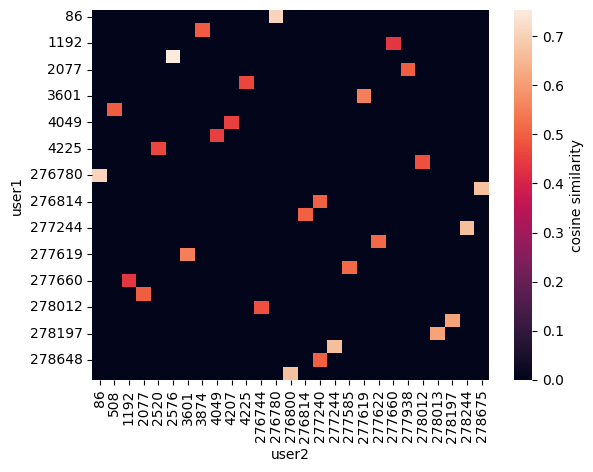

In [209]:
# visualizing similarity between user1 and user2 using heatmap
n = pd.pivot_table(topSimUsers,index='user1',
                   columns='user2',
                   values='cosine')
n.fillna(0,inplace=True)
sns.heatmap(n,cbar_kws={'label':'cosine similarity'})
plt.show()

In [210]:
topSimUsers.head()

,user1,user2,cosine
364,1348,2576,0.752577
1573,276780,86,0.707107
28,86,276780,0.707107
2134,278675,276800,0.668965
1578,276800,278675,0.668965


In [211]:
# get recommendation 
recom = [] 
for j in topSimUsers.index:
    user1 = topSimUsers.loc[j][0]
    user2 = topSimUsers.loc[j][1]
    k = book[(book['User.ID'] == user1) | (book['User.ID'] == user2)]
    a = set(k[k['User.ID'] == user1]['Book.Title'].values)
    b = set(k[k['User.ID'] == user2]['Book.Title'].values)
    if a-b:
        recom += [[user2,i] for i in a-b]
    else:
        pass

In [212]:
recomUser = pd.DataFrame(recom,columns=['UserID','RecommendedBook'])

In [213]:
# book recommendations given by recommendation engine 
Recommendation = pd.pivot_table(recomUser,index=['UserID','RecommendedBook'])

In [214]:
Recommendation

Empty DataFrame
Columns: []
Index: [(86.0, Wild Animus), (508.0, Aldo Applesauce), (508.0, Touched by an Angel), (1192.0, Zlateh the Goat and Other Stories), (2077.0, Elfstones of Shannara), (2077.0, Ogre, Ogre), (2077.0, The Stand: Complete and Uncut), (2520.0, A Treasure Worth Seeking), (2520.0, Big Bad Wolfe: At The Altar! (By Request 2'S) (By Request 2's)), (2520.0, No Marriage of Convenience (Avon Romantic Treasure)), (2520.0, Wrong Man ... The Right Time (Silhouette Special Edition, No 1089)), (2576.0, Fantastic Beasts and Where to Find Them), (3874.0, Road Rage), (4207.0, LA Actitud Mental Positiva: UN Camino Hacia El Exito/Success Through an Positive Mental Attitude), (4207.0, La rueda de la vida), (4207.0, Las mujeres en la historia de EspaÃ±a (Documento)), (4207.0, Yo Estoy Bien Tu Estas Bien), (4225.0, Dogsong), (276744.0, Adventures of Huckleberry Finn (Signet Classics (Paperback))), (276744.0, Chicken Soup for the Mother's Soul (Chicken Soup for the Soul Series (Paper))), (276744.0, Sacred Journey of the Peaceful Warrior), (276744.0, The Adventures of Augie March), (276800.0, Martha Stuart's Better Than You at Entertaining (A Parody)), (277240.0, Growing Pains of Adrian Mole), (277240.0, Left Behind: A Novel of the Earth's Last Days (Left Behind #1)), (277240.0, Love Me Tender (Starlight)), (277240.0, Love, Medicine and Miracles), (277240.0, Plane Insanity: A Flight Attendant's Tales of Sex, Rage, and Queasiness at 30,000 Feet), (277619.0, Christina Katerina and the Time She Quit the Family), (277619.0, The Littlest Christmas Tree: A Tale of Growing &amp; Becoming), (277622.0, The Mothman Prophecies), (277622.0, The Stars Shine Down), (277622.0, This Present Darkness), (277660.0, Childhood's End), (278013.0, The Torn Skirt), (278244.0, Primal Scream), (278244.0, The Teacher from the Black Lagoon)]